### SVM
- https://github.com/ageron/handson-ml/blob/master/05_support_vector_machines.ipynb
- http://scikit-learn.org/stable/modules/svm.html

- 对于SVM，决策边界为$w \cdot x + b = 0$，其中$w$和$b$就是需要训练的参数
- 下面的例子只有两个feature，决策边界为：$w_0 * x_0 + w_1 * x_1 + b = 0$

In [1]:
import os
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [2]:
PROJECT_ROOT_DIR = '.'
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]  # 沿x1移动的距离
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

#     svs = svm_clf.support_vectors_
#     plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [66]:
iris = datasets.load_iris()
print(iris.feature_names)
X = iris['data'][:, (2, 3)]   # petal length, petal width
y = (iris['target'] == 2).astype(np.float64)  # convert True/False to 1/0, # Iris-Virginica
print(X[:5])
print(y[:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 1.4  0.2]
 [ 1.4  0.2]
 [ 1.3  0.2]
 [ 1.5  0.2]
 [ 1.4  0.2]]
[ 0.  0.  0.  0.  0.]


#### Pipeline 串联两个操作

In [5]:
svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
))  
svm_clf.fit(X, y)
print(svm_clf.predict([[5.5, 1.7]]))

[ 1.]


#### 为了查看SVM模型训练后的参数，分两步进行

In [6]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[:5])

[[-1.3412724  -1.31297673]
 [-1.3412724  -1.31297673]
 [-1.39813811 -1.31297673]
 [-1.2844067  -1.31297673]
 [-1.3412724  -1.31297673]]


In [21]:
C1 = 1
C2 = 100
svm_clf2 = LinearSVC(C=C1, loss="hinge")
svm_clf2.fit(X_scaled, y)
svm_clf3 = LinearSVC(C=C2, loss="hinge")
svm_clf3.fit(X_scaled, y)
print(svm_clf2.coef_, svm_clf2.intercept_)  # w and b
print(np.min(X_scaled), np.max(X_scaled))

[[ 1.63738906  2.38653151]] [-2.50814762]
-1.56873522072 1.78634131465


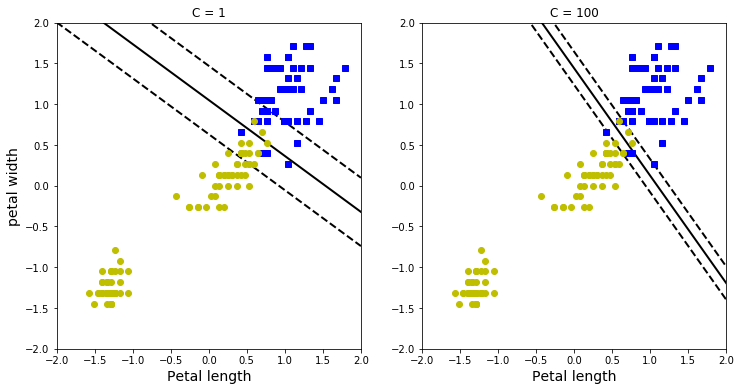

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_svc_decision_boundary(svm_clf2, -2, 2)
plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], "bs")
plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.title('C = {}'.format(C1))
plt.axis([-2, 2, -2, 2])
# plt.tight_layout()
# plt.savefig('abc.png', dpi=200)
# plt.show()

# fig, ax = plt.subplots(1, 1)
plt.subplot(122)
plot_svc_decision_boundary(svm_clf3, -2, 2)
plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], "bs")
plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.title('C = {}'.format(C2))
# plt.ylabel("petal width", fontsize=14)
plt.axis([-2, 2, -2, 2])
# plt.tight_layout()
# plt.savefig('abc.png', dpi=200)
plt.show()

----
#### Another example

In [84]:
X2 = np.array([[1, 2], [2, 1], [2, 3], [3, 2], [4, 5], [5, 4], [5, 6], [6, 5]])
X2.shape

(8, 2)

In [85]:
np.ones([1, 4])

array([[ 1.,  1.,  1.,  1.]])

In [86]:
y2 = np.array([-1, -1, -1, -1, 1, 1, 1, 1])
y2.shape

(8,)

In [106]:
C3 = 1
svm_clf3 = LinearSVC(C=C3, loss="hinge")
svm_clf3.fit(X2, y2)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [107]:
svm_clf3.coef_, svm_clf3.intercept_

(array([[ 0.33332827,  0.33332995]]), array([-1.99996116]))

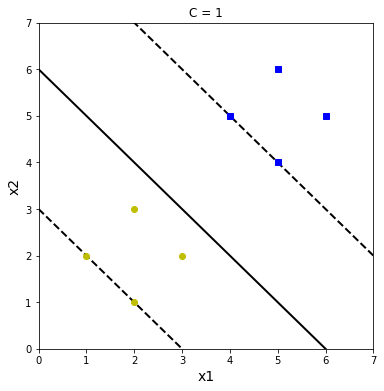

In [108]:
plt.figure(figsize=(6, 6))

plot_svc_decision_boundary(svm_clf3, 0, 7)
plt.plot(X2[:, 0][y2==1], X2[:, 1][y2==1], "bs")
plt.plot(X2[:, 0][y2==-1], X2[:, 1][y2==-1], "yo")
plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
plt.title('C = {}'.format(C3))
plt.axis([0, 7, 0, 7])
plt.show()